In [7]:
import json
import numpy as np
import os

# Load the asymmetry data from the JSON file
with open('raw_data/asymmetry.json', 'r') as infile:
    asymmetry_data = json.load(infile)

# Dictionary to store the processed data (mean and standard deviation for each image)
processed_asymmetry_data = {}

# Calculate mean and standard deviation of asymmetries for each image
for image_path, asymmetries in asymmetry_data.items():
    # Flatten all asymmetry values (both axes, all rotations) for each image
    all_asymmetries = [value for rotation in asymmetries.values() for value in rotation]
    # Calculate mean and standard deviation
    mean_asymmetry = np.mean(all_asymmetries)
    std_asymmetry = np.std(all_asymmetries)
    # Store the results
    processed_asymmetry_data[image_path] = {'mean': mean_asymmetry, 'std': std_asymmetry}

# Save processed results to JSON file
os.makedirs('processed_data', exist_ok=True)  # Ensure the directory exists
with open('processed_data/asymmetry.json', 'w') as outfile:
    json.dump(processed_asymmetry_data, outfile, indent=4)

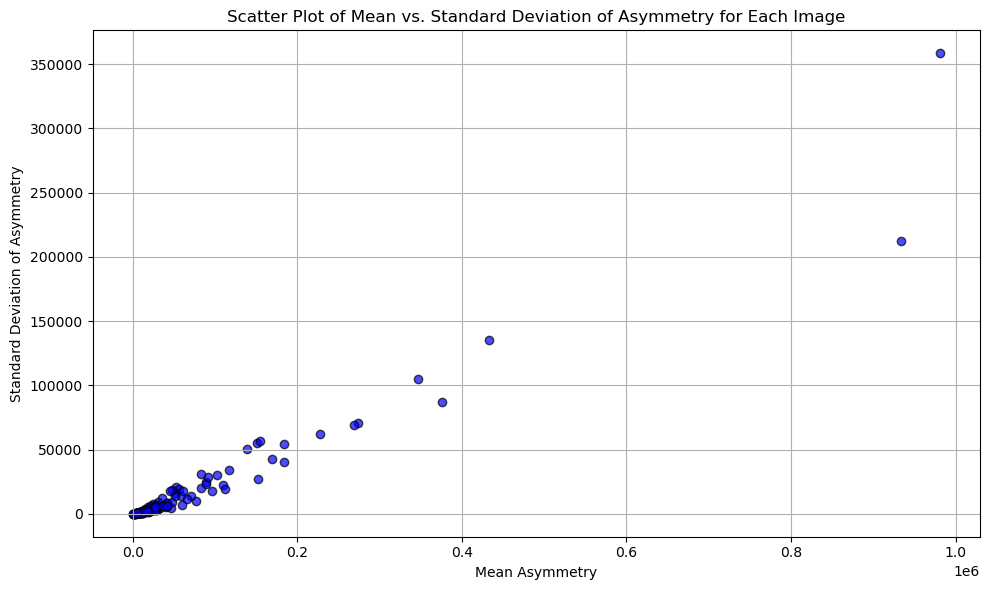

In [8]:
import matplotlib.pyplot as plt

# Extract mean and standard deviation values for plotting
means = [details['mean'] for details in processed_asymmetry_data.values()]
stds = [details['std'] for details in processed_asymmetry_data.values()]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(means, stds, alpha=0.7, color='blue', edgecolors='black')
plt.xlabel('Mean Asymmetry')
plt.ylabel('Standard Deviation of Asymmetry')
plt.title('Scatter Plot of Mean vs. Standard Deviation of Asymmetry for Each Image')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Assuming processed_asymmetry_data contains our needed data
images_above_threshold = []

# Define the threshold
threshold = 0.4E6  # 400,000

# Check each image for its mean asymmetry
for image_path, stats in processed_asymmetry_data.items():
    if stats['mean'] > threshold:
        images_above_threshold.append(image_path)

# Print the list of images
print("Images with mean asymmetry above 400,000:")
for image in images_above_threshold:
    print(image)


Images with mean asymmetry above 400,000:
group_A_masks/masks/mask2/PAT_1725_3222_943_mask.png
group_A_masks/masks/mask3/PAT_241_367_89_mask.png
group_A_masks/masks/mask4/PAT_645_4043_374_mask.png


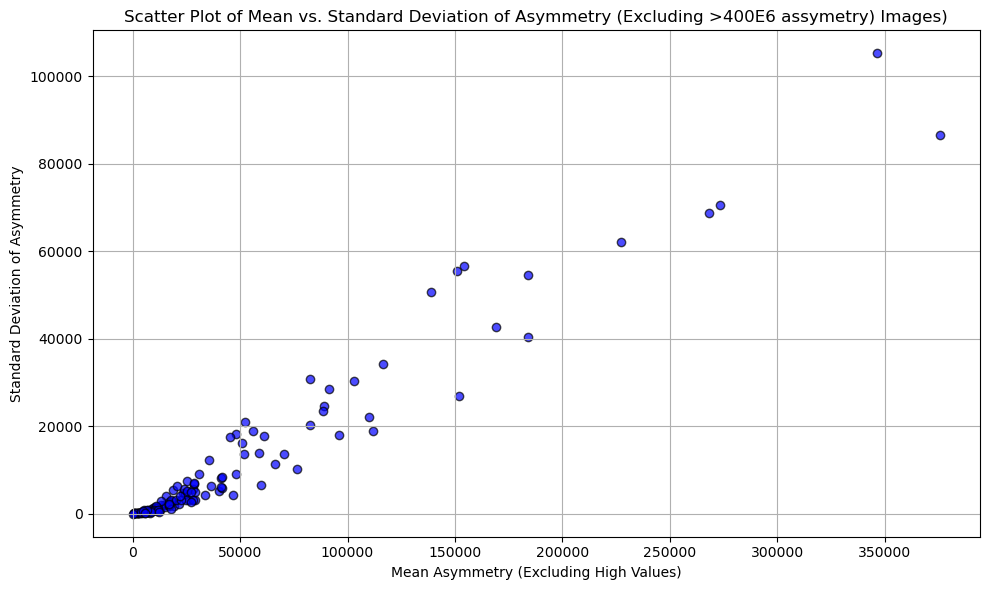

In [10]:
# Initialize lists for means and standard deviations excluding those above the threshold
filtered_means = []
filtered_stds = []

# Populate the lists, excluding images from images_above_threshold
for image_path, stats in processed_asymmetry_data.items():
    if image_path not in images_above_threshold:  # Only include if not in the excluded list
        filtered_means.append(stats['mean'])
        filtered_stds.append(stats['std'])

# Create scatter plot with the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_means, filtered_stds, alpha=0.7, color='blue', edgecolors='black')
plt.xlabel('Mean Asymmetry (Excluding High Values)')
plt.ylabel('Standard Deviation of Asymmetry')
plt.title('Scatter Plot of Mean vs. Standard Deviation of Asymmetry (Excluding >400E6 assymetry) Images)')
plt.grid(True)
plt.tight_layout()
plt.show()